# A Single user's Reception in different Subreddits

Analysing the reception of users' comments in different subreddits. Reception is defined by the score.

Hypothesis - a regular Reddit user's reception in different subreddits will be consistent. A user active in an echo chamber will be well recieved in the echo chamber (and similar subs) but not in 'outside' subreddits. 

## Authenticate into Reddit API

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import praw

reddit = praw.Reddit(client_id='1QKQYY6zEUgYUw',
                     client_secret='8xyLf9B_raDH9FIs54t3yzYqBqc',
                     password='redditpw',
                     user_agent='testscript by /u/praw_test_1',
                     username='praw_test_1')

In [2]:
reddit.config.store_json_result = True
subreddit = reddit.subreddit("changemyview")

## Get the 10 latest users active in sub

In [3]:
for post in subreddit.new(limit=10):
    print(post.title)

CMV: The two statements “Everything is matter” and “Everything is consciousness” are equal and are describing the same thing.
It's Fresh Topic Friday - 04/12/2019
CMV: Although the criminal justice system needs reform, prisoner had a choice to commit the crime.
CMV: Woodrow Wilson was America's worst president
CMV: People who claim Capitalism "caused" or is responsible for Climate Change are pushing a political agenda or simply wish it to be true.
CMV: it should be more socially acceptable to play videos and/or music in shared restrooms as a deterrent from listening to other people shitting
CMV: Discriminating on Weight is not the same as discriminating based on Height, in regards to dating apps/preferences
CMV: Reparations for slavery will never work.
CMV: I don't mind that people correct grammar on Reddit.
CMV: Dr. Katie Bouman should not be receiving as much credit as she is for the first image of a black hole.


## A user's activity posting and commenting

In [18]:
# POSTING ACTIVITY FOR USER
sub_posts = []

for submission in reddit.redditor('MontanaLabrador').submissions.top('all'):
    sub_posts.append(submission.subreddit.display_name)
    
l = list(numpy.array(sub_posts))
unique, counts = numpy.unique(l, return_counts=True)
# dict(zip(unique, counts))

In [19]:
# COMMENTS FOR A USER
sub_comments = []

for submission in reddit.redditor('MontanaLabrador').comments.top('all'):
    sub_comments.append(submission.subreddit.display_name)
    
k = list(numpy.array(sub_comments))
unique_comments, counts_comments = numpy.unique(k, return_counts=True)
# dict(zip(unique_comments, counts_comments))

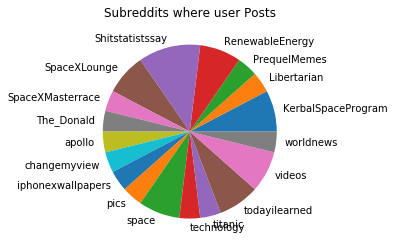

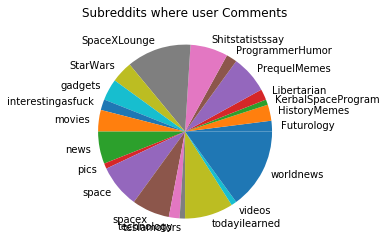

In [20]:
plt.pie(counts, explode=None, labels=unique)
plt.title('Subreddits where user Posts')
plt.show()

plt.pie(counts_comments, explode=None, labels=unique_comments)
plt.title('Subreddits where user Comments')
plt.show()

## User's parcitipation in subreddits over time

In [22]:
# COMMENTS AND POSTS FOR A USER - IN TIME
sub_name = []
sub_id = []
sub_time = []


for comment in reddit.redditor('MontanaLabrador').comments.top('all'):
    sub_name.append(comment.subreddit.display_name)
    sub_id.append(comment.id)
    sub_time.append(comment.created_utc)
    
for post in reddit.redditor('MontanaLabrador').submissions.top('all'):
    sub_name.append(post.subreddit.display_name)
    sub_id.append(post.id)
    sub_time.append(post.created_utc)

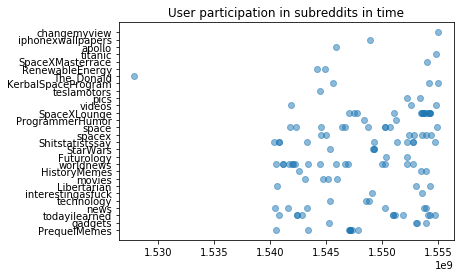

In [73]:
df=pd.DataFrame({'x': sub_time, 'y1': sub_name})

plt.scatter(sub_time, sub_name, alpha=0.5)
plt.title('User participation in subreddits in time' )
plt.show()

## User's Reception in different subs

In [62]:
# ACTIONS FOR A USER 
action_content = []
action_comment = []
action_submission = []
action_id = []
action_time = []
action_sub = []
action_score = []

# Loop through user's comments and posts to populate arrays
for comment in reddit.redditor('MontanaLabrador').comments.top('all'):
    action_content.append(comment.body)
    action_comment.append(1)
    action_submission.append(0)
    action_id.append(comment.id)
    action_time.append(comment.created_utc)
    action_sub.append(comment.subreddit.display_name)
    action_score.append(int(comment.score))
    
for post in reddit.redditor('MontanaLabrador').submissions.top('all'):
    action_content.append(post.title)
    action_comment.append(0)
    action_submission.append(1)
    action_id.append(post.id)
    action_time.append(post.created_utc)
    action_sub.append(post.subreddit.display_name)
    action_score.append(int(post.score))

In [67]:
# create a dictionary
ex_dic = {
    'sub': action_sub,
    'score': action_score
}

# Create columns
columns = ['sub', 'score']


# Create dataframe
df_user_scores = pd.DataFrame(ex_dic, columns=columns)

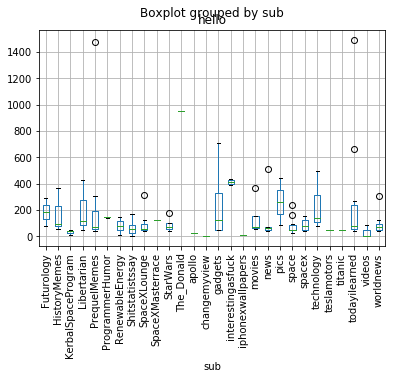

In [72]:
df_user_scores.boxplot('score', 'sub', rot=90)
plt.title('hello')
plt.show()